In [4]:
function fibonacci(n)
  a::BigInt = b::BigInt = 1
  # a = b = 1
  for i in 3:n
    a, b = b, a + b
  end
  return b
end

fibonacci (generic function with 1 method)

In [5]:
@time fibonacci(200)

  0.001014 seconds (400 allocations: 11.141 KiB)


280571172992510140037611932413038677189525

In [6]:
path = @ccall getenv("SHELL"::Cstring)::Cstring
unsafe_string(path)

"/bin/bash"

In [7]:
calc_mean = () -> ccall((:mean, "./libmean.so"), Cdouble, (Cdouble, Cdouble, Cdouble), 1.0, 2.0, 3.2)
@time ret = calc_mean()

  0.022293 seconds (1.87 k allocations: 86.406 KiB, 99.83% compilation time)


2.066666666666667

In [8]:
calc_mean = (x, y, z) -> @ccall "./libmean".mean(x::Cdouble, y::Cdouble, z::Cdouble)::Cdouble
@time ret = calc_mean(1.0, 2.0, 3.4)

  0.013907 seconds (1.44 k allocations: 66.734 KiB, 99.55% compilation time)


2.1333333333333333

In [9]:
function gethostname2()
  # buf = Ref{UInt8}(0)
  buf = Vector{UInt8}(undef, 256)
  err = @ccall gethostname(buf::Ptr{UInt8}, sizeof(buf)::UInt)::Int32
  buf[end] = 0
  return GC.@preserve buf unsafe_string(pointer(buf))
end

gethostname2 (generic function with 1 method)

In [10]:
@time gethostname2()
@time gethostname()

  0.000007 seconds (3 allocations: 352 bytes)
  0.000006 seconds (3 allocations: 352 bytes)


"LAPTOP-TN0NONHF"

In [11]:
const REF_ID = Ref(8)
next_ref_id() = (id = REF_ID[]; REF_ID[] = id+1; id)
println(next_ref_id())

8


In [12]:
a = Vector{Int}(undef, 10)
Threads.@threads for i = 1:10
  a[i] = Threads.threadid()
end
println(a)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
using PyCall
pd = pyimport("pandas")
df = pd.DataFrame([1, 2, 3], columns=["a"])

,a
0,1
1,2
2,3


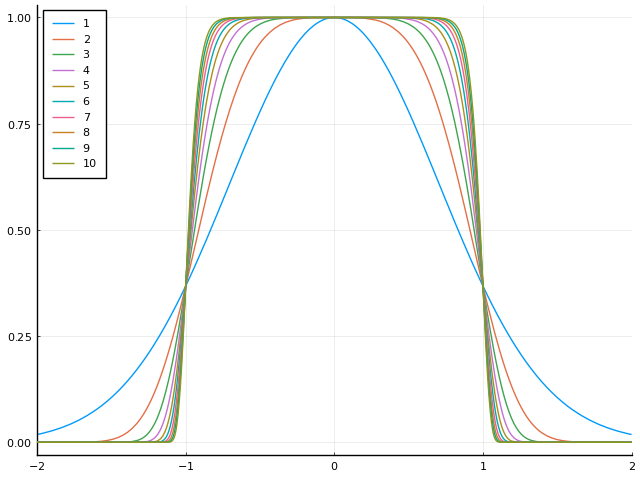

In [19]:
ENV["GKS_ENCODING"] = "utf8"
using Plots
pyplot()
# gr()
plt = plot()
for i in 1:10
    plot!(plt, x->exp(-x^(2*i)), label=string(i), legend=:topleft, xlim=(-2,2))
end
plot(plt)

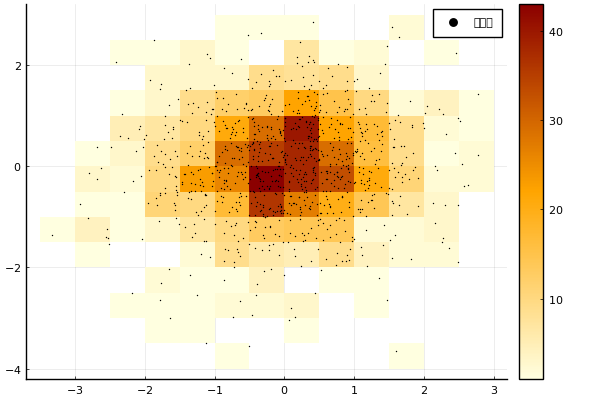

sys:1: UserWarning: Glyph 12354 (\N{HIRAGANA LETTER A}) missing from current font.


In [20]:
X = randn(1000)
Y = randn(1000)

histogram2d(X, Y, nbins=20, c=:heat)
scatter!(X, Y, mc="#000000", msw=0, ms=1, label="あああ")

In [3]:
@doc "hogehoge" g = sin(1)
@doc g

hogehoge


In [4]:
x = 1:0.1:10
logx = log.(x)
logmat = [ x logx]
println(logmat)
y = range(start=3, stop=13, length=x.len)

[1.0 0.0; 1.1 0.09531017980432493; 1.2 0.1823215567939546; 1.3 0.26236426446749106; 1.4 0.3364722366212129; 1.5 0.4054651081081644; 1.6 0.47000362924573563; 1.7 0.5306282510621704; 1.8 0.5877866649021191; 1.9 0.6418538861723947; 2.0 0.6931471805599453; 2.1 0.7419373447293773; 2.2 0.7884573603642703; 2.3 0.8329091229351039; 2.4 0.8754687373538999; 2.5 0.9162907318741551; 2.6 0.9555114450274363; 2.7 0.9932517730102834; 2.8 1.0296194171811581; 2.9 1.0647107369924282; 3.0 1.0986122886681098; 3.1 1.1314021114911006; 3.2 1.1631508098056809; 3.3 1.1939224684724346; 3.4 1.2237754316221157; 3.5 1.252762968495368; 3.6 1.2809338454620642; 3.7 1.308332819650179; 3.8 1.33500106673234; 3.9 1.3609765531356006; 4.0 1.3862943611198906; 4.1 1.410986973710262; 4.2 1.4350845252893227; 4.3 1.4586150226995167; 4.4 1.4816045409242156; 4.5 1.5040773967762742; 4.6 1.5260563034950492; 4.7 1.547562508716013; 4.8 1.5686159179138452; 4.9 1.589235205116581; 5.0 1.6094379124341003; 5.1 1.62924053973028; 5.2 1.648658

3.0:0.1111111111111111:13.0

In [5]:
logmat'y

2-element Vector{Float64}:
 4701.666666666667
 1284.1206407113511

In [6]:
logmat .+ y

91×2 Matrix{Float64}:
  4.0       3.0
  4.21111   3.20642
  4.42222   3.40454
  4.63333   3.5957
  4.84444   3.78092
  5.05556   3.96102
  5.26667   4.13667
  5.47778   4.30841
  5.68889   4.47668
  5.9       4.64185
  6.11111   4.80426
  6.32222   4.96416
  6.53333   5.12179
  ⋮        
 20.6778   13.9638
 20.8889   14.0861
 21.1      14.2083
 21.3111   14.3303
 21.5222   14.4522
 21.7333   14.574
 21.9444   14.6957
 22.1556   14.8173
 22.3667   14.9388
 22.5778   15.0602
 22.7889   15.1814
 23.0      15.3026

In [7]:
x .+ y'

91×91 Matrix{Float64}:
  4.0   4.11111   4.22222   4.33333  …  13.6667  13.7778  13.8889  14.0
  4.1   4.21111   4.32222   4.43333     13.7667  13.8778  13.9889  14.1
  4.2   4.31111   4.42222   4.53333     13.8667  13.9778  14.0889  14.2
  4.3   4.41111   4.52222   4.63333     13.9667  14.0778  14.1889  14.3
  4.4   4.51111   4.62222   4.73333     14.0667  14.1778  14.2889  14.4
  4.5   4.61111   4.72222   4.83333  …  14.1667  14.2778  14.3889  14.5
  4.6   4.71111   4.82222   4.93333     14.2667  14.3778  14.4889  14.6
  4.7   4.81111   4.92222   5.03333     14.3667  14.4778  14.5889  14.7
  4.8   4.91111   5.02222   5.13333     14.4667  14.5778  14.6889  14.8
  4.9   5.01111   5.12222   5.23333     14.5667  14.6778  14.7889  14.9
  5.0   5.11111   5.22222   5.33333  …  14.6667  14.7778  14.8889  15.0
  5.1   5.21111   5.32222   5.43333     14.7667  14.8778  14.9889  15.1
  5.2   5.31111   5.42222   5.53333     14.8667  14.9778  15.0889  15.2
  ⋮                                  ⋱   

In [29]:
logmat[:]

182-element Vector{Float64}:
 1.0
 1.1
 1.2
 1.3
 1.4
 1.5
 1.6
 1.7
 1.8
 1.9
 2.0
 2.1
 2.2
 ⋮
 2.186051276738094
 2.1972245773362196
 2.2082744135228043
 2.2192034840549946
 2.2300144001592104
 2.2407096892759584
 2.2512917986064953
 2.2617630984737906
 2.272125885509337
 2.2823823856765264
 2.2925347571405443
 2.302585092994046

In [8]:
# z = @.(x^2 + y^2)
# zexp = @. exp(x^2 + y'^2)
# zexp = exp.(z)
exp.(broadcast(+, broadcast(^, x, 2), broadcast(^, y', 2)))

91×91 Matrix{Float64}:
  22026.5         43434.6         …  3.80886e72   6.76179e73
  27173.6         53584.4            4.69891e72   8.34188e73
  34200.7         67441.3            5.91405e72   1.04991e74
  43914.5         86596.3            7.59378e72   1.34811e74
  57526.4             1.13438e5      9.94759e72   1.76598e74
  76879.9             1.51602e5   …  1.32942e73   2.3601e74
 104820.0             2.06698e5      1.81257e73   3.21782e74
      1.45801e5       2.8751e5       2.52123e73   4.47588e74
      2.06902e5       4.07996e5      3.57779e73   6.35158e74
 299539.0             5.9067e5       5.17969e73   9.1954e74
      4.42413e5       8.72408e5   …  7.6503e73    1.35814e75
      6.66636e5       1.31456e6      1.15276e74   2.04647e75
      1.02479e6       2.02082e6      1.77209e74   3.14596e75
      ⋮                           ⋱               ⋮
      2.03759e38      4.01798e38     3.52344e106  6.25509e107
      1.2204e39       2.40655e39  …  2.11035e107  3.74645e108
      7.45

In [9]:
b = [[9 11; 10 12], [13 15; 14 16]];
b[1][2, 1]

10

In [10]:
print(ndims(y), " ", ndims(y'))
logmat[3, 2]

1 2

0.1823215567939546

In [11]:
(ntuple(_ -> 1, ndims(y'))..., size(logmat)...)

(1, 1, 91, 2)

In [12]:
A = ["a$i$j" for i in 1:2, j in 1:3]
B = ["b$i" for i in 1:4]
expanddim(B, A) = reshape(B, ((ntuple(_ -> 1, ndims(A))..., size(B)...)))
C2 = tuple.(A, expanddim(B, A))
# expanddim(logmat, y')

2×3×4 Array{Tuple{String, String}, 3}:
[:, :, 1] =
 ("a11", "b1")  ("a12", "b1")  ("a13", "b1")
 ("a21", "b1")  ("a22", "b1")  ("a23", "b1")

[:, :, 2] =
 ("a11", "b2")  ("a12", "b2")  ("a13", "b2")
 ("a21", "b2")  ("a22", "b2")  ("a23", "b2")

[:, :, 3] =
 ("a11", "b3")  ("a12", "b3")  ("a13", "b3")
 ("a21", "b3")  ("a22", "b3")  ("a23", "b3")

[:, :, 4] =
 ("a11", "b4")  ("a12", "b4")  ("a13", "b4")
 ("a21", "b4")  ("a22", "b4")  ("a23", "b4")

In [13]:
sort(logmat .* rand(size(logmat)[1]), dims=1)

91×2 Matrix{Float64}:
 0.00787938  0.0
 0.258704    0.00247934
 0.258994    0.0382973
 0.271499    0.059908
 0.305092    0.0660358
 0.307522    0.0724526
 0.337021    0.0727258
 0.35928     0.073909
 0.397918    0.103462
 0.441999    0.104791
 0.497132    0.119172
 0.540204    0.128017
 0.640988    0.134929
 ⋮           
 5.13156     1.35072
 5.32845     1.49615
 5.34471     1.50209
 5.86609     1.57877
 6.11214     1.68974
 6.16623     1.75057
 6.83745     1.78567
 6.91034     1.80794
 7.45725     1.82635
 7.7519      1.86213
 7.7658      1.86584
 9.41455     2.20526

In [14]:
@macroexpand @. exp(x^2 + y'^2)

:(exp.((+).((^).(x, 2), (^).(y', 2))))